In [1]:
# 기본 라이브러리
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("CorporateCredit(preprocessed).csv", index_col=0, dtype={'sec_1': str})
df.head()

,cik,sector,sic_1,current_ratio_pos,current_ratio_neg,long_term_debt_capital_pos,long_term_debt_capital_neg,debt_equity_ratio_pos,debt_equity_ratio_neg,gross_margin_pos,...,roa_return_on_assets_neg,roi_return_on_investment_pos,roi_return_on_investment_neg,operating_cash_flow_per_share_pos,operating_cash_flow_per_share_neg,free_cash_flow_per_share_pos,free_cash_flow_per_share_neg,rating,rating_int_17,rating_int_23
0,1056903,Utils,4,0.765793,0.0,0.375075,0.0,0.633769,0.0,4.364664,...,0.0,1.696166,0.0,1.097178,0.00000,0.000000,0.125134,A-,10,16
1,8670,BusEq,7,0.748061,0.0,0.007174,0.0,0.007273,0.0,3.799121,...,0.0,3.130110,0.0,0.223224,0.00000,0.272467,0.000000,AAA,16,22
2,8858,Shops,5,1.074183,0.0,0.256501,0.0,0.354523,0.0,2.557289,...,0.0,2.365504,0.0,0.000000,2.15268,0.000000,2.119035,BBB-,7,13
3,1035201,Utils,4,0.607480,0.0,0.385806,0.0,0.667368,0.0,4.182197,...,0.0,1.808584,0.0,1.009344,0.00000,0.000000,0.641801,AA-,13,19
4,721371,Shops,5,0.829905,0.0,0.234598,0.0,0.339040,0.0,1.576605,...,0.0,2.217506,0.0,1.089403,0.00000,1.228880,0.000000,A,11,17


In [4]:
df_g17 = df.drop(columns=['rating', 'rating_int_23'])

In [5]:
X_train, X_test = train_test_split(df_g17, test_size=0.3, random_state=2024)

In [6]:
X_train.shape, X_test.shape

((5463, 36), (2342, 36))

In [7]:
import pycaret.regression as crt_reg

In [8]:
crt_reg.setup(X_train,
              session_id = 2024,
              remove_multicollinearity = True,
              multicollinearity_threshold = 0.8,
              )


params = """
로그 변환 or 정규화

polynomial_features=True
low_variance_threshold: float or None, default = None
polynomial_features=True
remove_multicollinearity = True
multicollinearity_threshold = 0.8
remove_outliers = True
outliers_method = 'lof'
outliers_threshold: float, default = 0.05

feature_selection = True
https://pycaret.gitbook.io/docs/get-started/preprocessing/feature-selection
"""

,Description,Value
0,Session id,2024
1,Target,rating_int_17
2,Target type,Regression
3,Original data shape,"(5463, 36)"
4,Transformed data shape,"(5463, 36)"
5,Transformed train set shape,"(3824, 36)"
6,Transformed test set shape,"(1639, 36)"
7,Numeric features,34
8,Categorical features,1
9,Preprocess,True


In [9]:
best_model = crt_reg.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.2219,3.1703,1.7773,0.7687,0.3198,0.2525,1.2340
xgboost,Extreme Gradient Boosting,1.2737,3.2285,1.7942,0.7643,0.3203,0.2590,0.4950
rf,Random Forest Regressor,1.3198,3.3736,1.8347,0.7541,0.3341,0.2775,2.3950
lightgbm,Light Gradient Boosting Machine,1.3930,3.5306,1.8770,0.7425,0.3439,0.2892,0.6350
knn,K Neighbors Regressor,1.4345,4.3030,2.0716,0.6858,0.3710,0.3064,0.1670
dt,Decision Tree Regressor,1.3823,4.6287,2.1448,0.6605,0.3746,0.2837,0.1320
gbr,Gradient Boosting Regressor,1.7531,5.1746,2.2728,0.6228,0.4080,0.3737,1.0400
br,Bayesian Ridge,2.2005,7.9712,2.8213,0.4190,0.4938,0.4729,0.0970
ridge,Ridge Regression,2.1994,7.9820,2.8229,0.4184,0.4924,0.4736,0.0930
lr,Linear Regression,2.1995,7.9869,2.8237,0.4181,0.4921,0.4738,1.5280


In [10]:
crt_reg.pull()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.2219,3.1703,1.7773,0.7687,0.3198,0.2525,1.234
xgboost,Extreme Gradient Boosting,1.2737,3.2285,1.7942,0.7643,0.3203,0.2590,0.495
rf,Random Forest Regressor,1.3198,3.3736,1.8347,0.7541,0.3341,0.2775,2.395
lightgbm,Light Gradient Boosting Machine,1.3930,3.5306,1.8770,0.7425,0.3439,0.2892,0.635
knn,K Neighbors Regressor,1.4345,4.3030,2.0716,0.6858,0.3710,0.3064,0.167
dt,Decision Tree Regressor,1.3823,4.6287,2.1448,0.6605,0.3746,0.2837,0.132
gbr,Gradient Boosting Regressor,1.7531,5.1746,2.2728,0.6228,0.4080,0.3737,1.040
br,Bayesian Ridge,2.2005,7.9712,2.8213,0.4190,0.4938,0.4729,0.097
ridge,Ridge Regression,2.1994,7.9820,2.8229,0.4184,0.4924,0.4736,0.093
lr,Linear Regression,2.1995,7.9869,2.8237,0.4181,0.4921,0.4738,1.528


In [11]:
tuned_model = crt_reg.tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.7671,5.2816,2.2982,0.6227,0.4254,0.3409
1,1.8362,5.6222,2.3711,0.5849,0.4031,0.3957
2,1.7321,5.1143,2.2615,0.6240,0.3695,0.3695
3,1.7473,5.2491,2.2911,0.6201,0.4094,0.3696
4,1.8345,5.5125,2.3479,0.6439,0.4178,0.4412
5,1.6846,4.8371,2.1993,0.5991,0.3934,0.4014
6,1.5946,4.4270,2.1040,0.6624,0.4070,0.3148
7,1.6059,4.4335,2.1056,0.6846,0.3985,0.3621
8,1.7497,4.7838,2.1872,0.6755,0.3848,0.3569


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [12]:
best_model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 2024,
 'verbose': 0,
 'warm_start': False}

In [13]:
crt_reg.evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

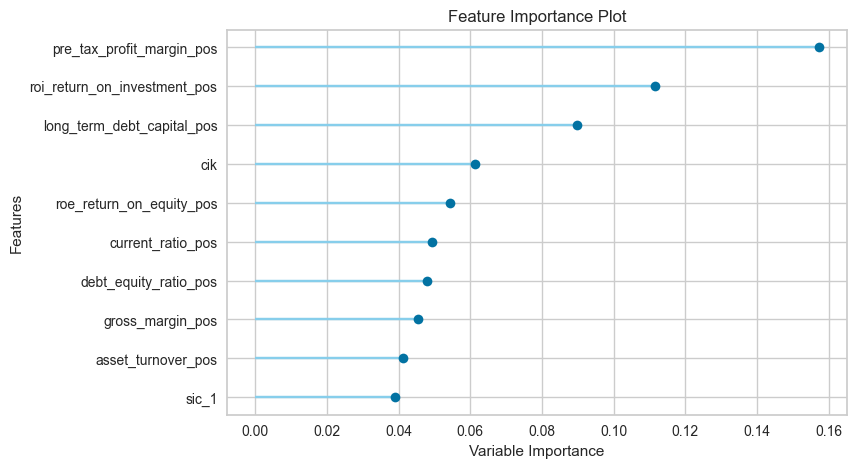

In [14]:
crt_reg.plot_model(tuned_model, plot='feature')

예측값 -> 클래스 -> 분류 결과 확인

17 Grade

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [16]:
pred_holdout = crt_reg.predict_model(tuned_model, data=X_test.iloc[:, :-1])

In [17]:
pred_holdout

,cik,sector,sic_1,current_ratio_pos,current_ratio_neg,long_term_debt_capital_pos,long_term_debt_capital_neg,debt_equity_ratio_pos,debt_equity_ratio_neg,gross_margin_pos,...,return_on_tangible_equity_neg,roa_return_on_assets_pos,roa_return_on_assets_neg,roi_return_on_investment_pos,roi_return_on_investment_neg,operating_cash_flow_per_share_pos,operating_cash_flow_per_share_neg,free_cash_flow_per_share_pos,free_cash_flow_per_share_neg,prediction_label
3359,940944,Shops,5,0.797867,0.0,0.427357,0.0,0.808839,0.000000,3.072888,...,0.000000,1.277205,0.000000,1.602433,0.000000,0.000000,0.297880,0.368594,0.000000,6.000000
4291,1022079,Hlth,8,0.912082,0.0,0.367971,0.0,0.589785,0.000000,3.734753,...,3.433116,2.100909,0.000000,2.285734,0.000000,1.038508,0.000000,0.990953,0.000000,9.000000
7398,62996,Manuf,3,0.869157,0.0,0.681277,0.0,4.090025,0.000000,3.482648,...,3.763126,2.078378,0.000000,2.838552,0.000000,0.509945,0.000000,0.452857,0.000000,9.532000
3501,915389,Chems,2,1.091487,0.0,0.477538,0.0,0.947634,0.000000,3.124464,...,3.441664,1.565089,0.000000,1.898279,0.000000,1.434561,0.000000,1.459080,0.000000,8.000000
1124,1004980,Utils,4,0.607698,0.0,0.397299,0.0,0.753348,0.000000,4.179636,...,0.000000,1.002322,0.000000,1.516752,0.000000,0.752548,0.000000,0.574701,0.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5394,27904,Other,4,0.434117,0.0,0.398977,0.0,0.740126,0.000000,3.058303,...,2.549570,0.797642,0.000000,1.571009,0.000000,0.473124,0.000000,0.632176,0.000000,11.000000
5058,886158,Shops,5,1.132047,0.0,0.302694,0.0,0.436188,0.000000,3.685955,...,0.000000,2.719049,0.000000,3.159763,0.000000,0.000000,0.212285,0.000000,0.394404,8.377167
1212,1481582,Shops,5,1.244932,0.0,0.819119,0.0,0.000000,1.778083,2.703285,...,0.000000,0.000000,0.355925,0.000000,0.632866,3.768123,0.000000,3.826957,0.000000,5.838833
5263,1475260,Enrgy,2,0.883230,0.0,0.299289,0.0,0.429051,0.000000,3.095469,...,0.000000,0.783125,0.000000,1.056331,0.000000,0.000000,0.278540,0.436447,0.000000,9.000000


In [18]:
pred_sr = pred_holdout.prediction_label.apply(lambda x: round(x))
cm = confusion_matrix(X_test.iloc[:, -1], pred_sr)

<Axes: >

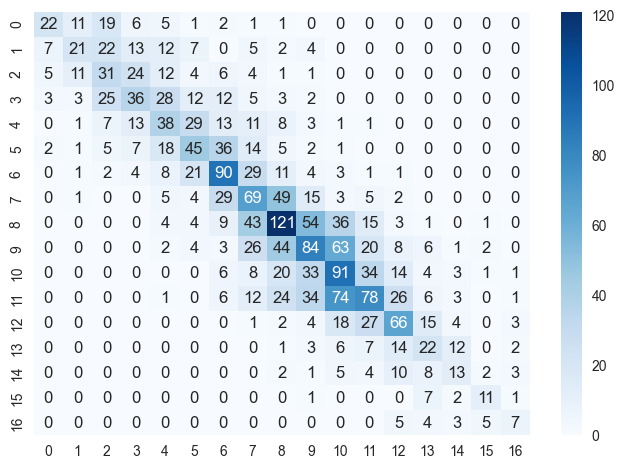

In [19]:
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [20]:
# 다중 클래스의 경우
accuracy = accuracy_score(X_test.iloc[:, -1], pred_sr)
precision = precision_score(X_test.iloc[:, -1], pred_sr, average='macro')
recall = recall_score(X_test.iloc[:, -1], pred_sr, average='macro')
f1 = f1_score(X_test.iloc[:, -1], pred_sr, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision (macro): {precision}")
print(f"Recall (macro): {recall}")
print(f"F1 Score (macro): {f1}")

Accuracy: 0.36080273270708796
Precision (macro): 0.3754449597817718
Recall (macro): 0.35205337072916415
F1 Score (macro): 0.3575772424172371


6 Grade

In [21]:
{'D': 0,
 'C': 0,
 'CC': 0,
 'CC+': 0,
 'CCC-': 0,
 'CCC': 0,
 'CCC+': 0,

 'B-': 1,
 'B': 2,
 'B+': 3,

 'BB-': 4,
 'BB': 5,
 'BB+': 6,

 'BBB-': 7,
 'BBB': 8,
 'BBB+': 9,

 'A-': 10,
 'A': 11,
 'A+': 12,
 
 'AA-': 13,
 'AA': 14,
 'AA+': 15,
 'AAA': 16}

{'D': 0,
 'C': 0,
 'CC': 0,
 'CC+': 0,
 'CCC-': 0,
 'CCC': 0,
 'CCC+': 0,
 'B-': 1,
 'B': 2,
 'B+': 3,
 'BB-': 4,
 'BB': 5,
 'BB+': 6,
 'BBB-': 7,
 'BBB': 8,
 'BBB+': 9,
 'A-': 10,
 'A': 11,
 'A+': 12,
 'AA-': 13,
 'AA': 14,
 'AA+': 15,
 'AAA': 16}

In [22]:
def grade6(g):
    if g == 0:
        return 0
    elif g < 4:
        return 1
    elif g < 7:
        return 2
    elif g < 10:
        return 3
    elif g < 13:
        return 4
    else:
        return 5

In [23]:
pred_sr = pred_holdout.prediction_label.apply(grade6)
y_sr = X_test.iloc[:, -1].apply(grade6)
cm = confusion_matrix(y_sr, pred_sr)

<Axes: >

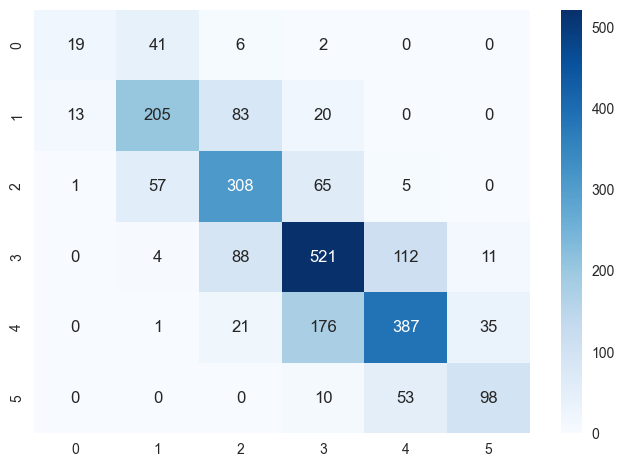

In [24]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [25]:
# 다중 클래스의 경우
accuracy = accuracy_score(y_sr, pred_sr)
precision = precision_score(y_sr, pred_sr, average='macro')
recall = recall_score(y_sr, pred_sr, average='macro')
f1 = f1_score(y_sr, pred_sr, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision (macro): {precision}")
print(f"Recall (macro): {recall}")
print(f"F1 Score (macro): {f1}")

Accuracy: 0.6567036720751495
Precision (macro): 0.6469263367517549
Recall (macro): 0.5942054503145369
F1 Score (macro): 0.6105444194052443
